In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./data/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="label", axis=1), data.label, test_size=0.2)

In [5]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [6]:
print("Train data shape : ", X_train.shape)
print("Train data label value : ", y_train.value_counts())

Train data shape :  (33600, 784)
Train data label value :  1    3717
7    3491
3    3488
9    3379
2    3345
0    3343
6    3293
4    3283
8    3211
5    3050
Name: label, dtype: int64


In [7]:
print("Test data shape : ", X_test.shape)
print("Test data label value : ", y_test.value_counts())

Test data shape :  (4200, 784)
Test data label value :  1    481
7    453
6    444
8    435
2    432
3    424
4    399
9    383
0    381
5    368
Name: label, dtype: int64


In [9]:
print("Validation data shape : ", X_val.shape)
print("Validation data label value : ", y_val.value_counts())

Validation data shape :  (4200, 784)
Validation data label value :  1    486
7    457
3    439
9    426
8    417
0    408
6    400
2    400
4    390
5    377
Name: label, dtype: int64


0


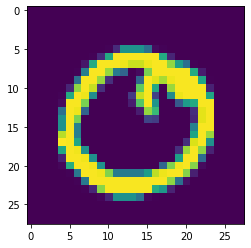

3


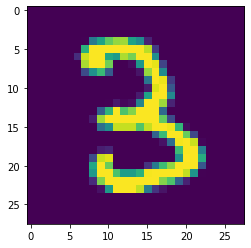

4


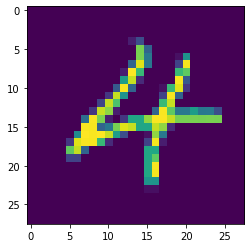

3


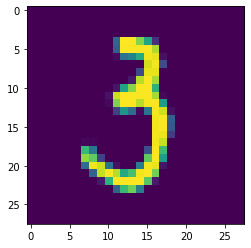

0


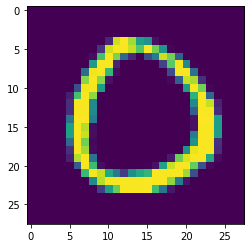

6


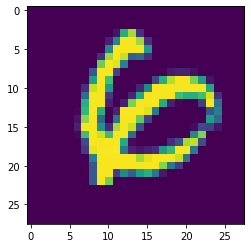

8


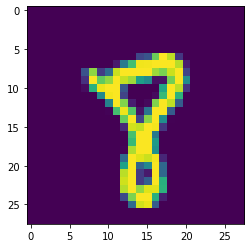

1


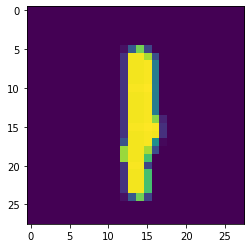

7


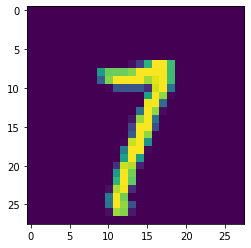

2


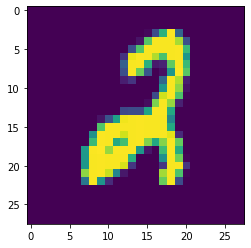

In [10]:
for i in np.random.permutation(range(X_train.shape[0]))[:10]:
    plt.imshow(X_train.iloc[i].values.reshape(28, 28))
    print(y_train.iloc[i])
    plt.show()

In [11]:
X_train = X_train.values.reshape(len(X_train), 28, 28)
X_val = X_val.values.reshape(len(X_val), 28, 28)
X_test = X_test.values.reshape(len(X_test), 28, 28)

In [13]:
# Model / data parameters
NUM_CLASSES = 10
INPUT_SHAPE = (28, 28, 1)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_val = X_val.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1, 1)


In [14]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test,NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val,NUM_CLASSES)

In [16]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=INPUT_SHAPE),
        layers.Flatten(),
        layers.Dense(NUM_CLASSES, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
BATCH_SIZE = 128
EPOCHS = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, 
          y_train, 
          batch_size=BATCH_SIZE, 
          epochs=EPOCHS, 
          validation_data=(X_val, y_val),
          verbose=2)

Epoch 1/30
263/263 - 2s - loss: 2.2811 - accuracy: 0.3978 - val_loss: 2.2587 - val_accuracy: 0.5371
Epoch 2/30
263/263 - 0s - loss: 2.2384 - accuracy: 0.5643 - val_loss: 2.2161 - val_accuracy: 0.5843
Epoch 3/30
263/263 - 0s - loss: 2.1967 - accuracy: 0.6077 - val_loss: 2.1745 - val_accuracy: 0.6414
Epoch 4/30
263/263 - 0s - loss: 2.1560 - accuracy: 0.6498 - val_loss: 2.1339 - val_accuracy: 0.6736
Epoch 5/30
263/263 - 0s - loss: 2.1161 - accuracy: 0.6754 - val_loss: 2.0941 - val_accuracy: 0.6902
Epoch 6/30
263/263 - 0s - loss: 2.0770 - accuracy: 0.6816 - val_loss: 2.0551 - val_accuracy: 0.7071
Epoch 7/30
263/263 - 0s - loss: 2.0387 - accuracy: 0.7046 - val_loss: 2.0170 - val_accuracy: 0.7200
Epoch 8/30
263/263 - 0s - loss: 2.0013 - accuracy: 0.7177 - val_loss: 1.9798 - val_accuracy: 0.7236
Epoch 9/30
263/263 - 1s - loss: 1.9646 - accuracy: 0.7183 - val_loss: 1.9432 - val_accuracy: 0.7333
Epoch 10/30
263/263 - 1s - loss: 1.9288 - accuracy: 0.7305 - val_loss: 1.9074 - val_accuracy: 0.7398